In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px



# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/sumeru-dataset/Sumeru SQL Data Set Test/products.csv
/kaggle/input/sumeru-dataset/Sumeru SQL Data Set Test/geolocation.csv
/kaggle/input/sumeru-dataset/Sumeru SQL Data Set Test/order_items.csv
/kaggle/input/sumeru-dataset/Sumeru SQL Data Set Test/orders.csv
/kaggle/input/sumeru-dataset/Sumeru SQL Data Set Test/order_reviews.xlsx
/kaggle/input/sumeru-dataset/Sumeru SQL Data Set Test/OTT_dataset_test.csv
/kaggle/input/sumeru-dataset/Sumeru SQL Data Set Test/customers.csv
/kaggle/input/sumeru-dataset/Sumeru SQL Data Set Test/sellers.csv
/kaggle/input/sumeru-dataset/Sumeru SQL Data Set Test/payments.csv
/kaggle/input/sumeru-dataset/Sumeru SQL Data Set Test/order_reviews.csv


The data is available in 8 csv files:
1. products.csv
2. geolocation.csv
3. order_items.csv
4. orders.csv
5. order_reviews.csv
6. customers.csv
7. sellers.csv
8. payments.csv

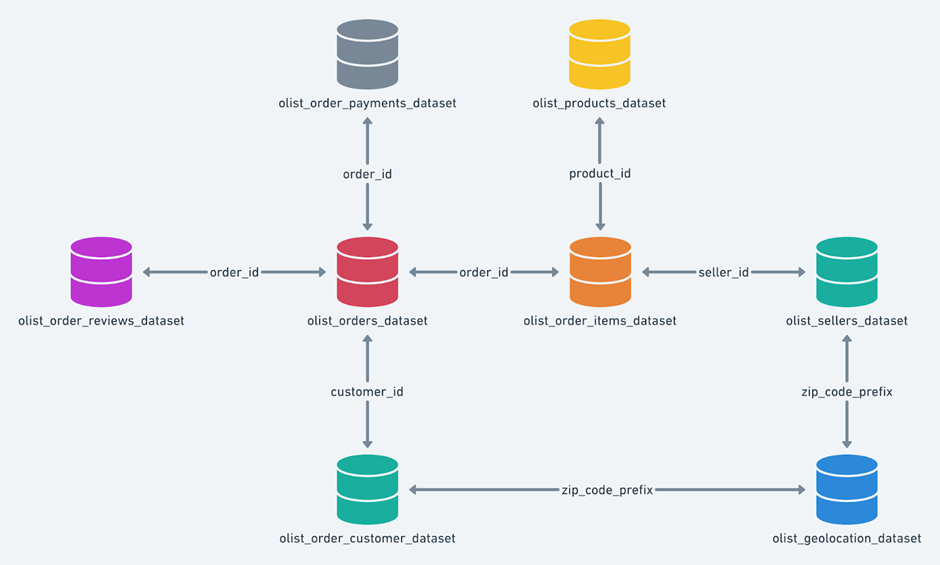

In [2]:
import sqlite3

# Define the path
path = '/kaggle/input/sumeru-dataset/Sumeru SQL Data Set Test/'

# Read CSV files into Pandas DataFrames
products_df = pd.read_csv(path + 'products.csv')
geolocation_df = pd.read_csv(path + 'geolocation.csv')
order_items_df = pd.read_csv(path + 'order_items.csv')
orders_df = pd.read_csv(path + 'orders.csv')
customers_df = pd.read_csv(path + 'customers.csv')
sellers_df = pd.read_csv(path + 'sellers.csv')
payments_df = pd.read_csv(path + 'payments.csv')

# Read the Excel file
order_reviews_df = pd.read_excel(path + 'order_reviews.xlsx')


# Create an SQLite connection and cursor
conn = sqlite3.connect(':memory:')  # Use an in-memory database for demonstration
cursor = conn.cursor()

# Store DataFrames in the SQLite database
products_df.to_sql('products', conn, index=False)
geolocation_df.to_sql('geolocation', conn, index=False)
order_items_df.to_sql('order_items', conn, index=False)
orders_df.to_sql('orders', conn, index=False)
customers_df.to_sql('customers', conn, index=False)
sellers_df.to_sql('sellers', conn, index=False)
payments_df.to_sql('payments', conn, index=False)
order_reviews_df.to_sql('order_reviews', conn, index=False)

99224

1. **Import the dataset and do usual exploratory analysis steps like checking the structure & characteristics of the dataset:**
    * Data type of all columns in the "customers" table.
    * Get the time range between which the orders were placed.
    * Count the Cities & States of customers who ordered during the given period.

In [3]:
query = '''
SELECT * FROM customers
LIMIT 5;
'''
pd.read_sql_query(query, conn)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [4]:
# Data type of all columns in the "customers" table.
query = '''
PRAGMA table_info(customers);
'''
pd.read_sql_query(query, conn)

,cid,name,type,notnull,dflt_value,pk
0,0,customer_id,TEXT,0,None,0
1,1,customer_unique_id,TEXT,0,None,0
2,2,customer_zip_code_prefix,INTEGER,0,None,0
3,3,customer_city,TEXT,0,None,0
4,4,customer_state,TEXT,0,None,0


In [5]:
# Data type of all columns in the "orders" table.
query = '''
PRAGMA table_info(orders);
'''
pd.read_sql_query(query, conn)

,cid,name,type,notnull,dflt_value,pk
0,0,order_id,TEXT,0,None,0
1,1,customer_id,TEXT,0,None,0
2,2,order_status,TEXT,0,None,0
3,3,order_purchase_timestamp,TEXT,0,None,0
4,4,order_approved_at,TEXT,0,None,0
5,5,order_delivered_carrier_date,TEXT,0,None,0
6,6,order_delivered_customer_date,TEXT,0,None,0
7,7,order_estimated_delivery_date,TEXT,0,None,0


In [6]:
query = '''
SELECT * FROM orders
LIMIT 5;
'''
pd.read_sql_query(query, conn)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [7]:
# Get the time range between which the orders were placed.
query = '''
SELECT 
    DISTINCT Min(order_purchase_timestamp) AS MinOrderDate,
    Max(order_purchase_timestamp) AS MaxOrderDate
FROM orders
WHERE order_status = 'delivered';
'''
pd.read_sql_query(query, conn)
# The dataset contains orders placed between September 15, 2016, 12:16:38 PM, and August 29, 2018, 3:00:37 PM.

,MinOrderDate,MaxOrderDate
0,2016-09-15 12:16:38,2018-08-29 15:00:37


In [8]:
# Count the Cities & States of customers who ordered during the given period.
query = '''
SELECT 
    DISTINCT c.customer_city AS City, 
    c.customer_state AS State, 
    Count(o.customer_id) AS Customer_Count
FROM customers c
JOIN orders o
ON c.customer_id = o.customer_id
WHERE 
    o.order_purchase_timestamp BETWEEN '2016-09-15 12:16:38' AND '2018-08-29 15:00:37'
GROUP BY City, State
ORDER BY 3 DESC;
'''
query_table = pd.read_sql_query(query, conn)
pd.read_sql_query(query, conn)
# We can see Sao Paulo, SP has most orders follow by Rio De Janeiro, RJ. 
# These two cities combine have 21K+ orders.

,City,State,Customer_Count
0,sao paulo,SP,15536
1,rio de janeiro,RJ,6881
2,belo horizonte,MG,2770
3,brasilia,DF,2131
4,curitiba,PR,1521
...,...,...,...
4305,vitoria do jari,AP,1
4306,vitorino,PR,1
4307,vitorinos,MG,1
4308,wagner,BA,1


In [9]:
# How are the customers distributed across all the states?
query = '''
SELECT
    customers.customer_state AS State,
    COUNT(customer_id) AS Customer_Count
FROM customers
GROUP BY customers.customer_state
ORDER BY 2 DESC;
'''
query_table = pd.read_sql_query(query, conn)
pd.read_sql_query(query, conn)
# State SP has a customer base three times larger than that of RJ.
# This suggests a positive correlation between a state's population and its order count.

,State,Customer_Count
0,SP,41746
1,RJ,12852
2,MG,11635
3,RS,5466
4,PR,5045
5,SC,3637
6,BA,3380
7,DF,2140
8,ES,2033
9,GO,2020


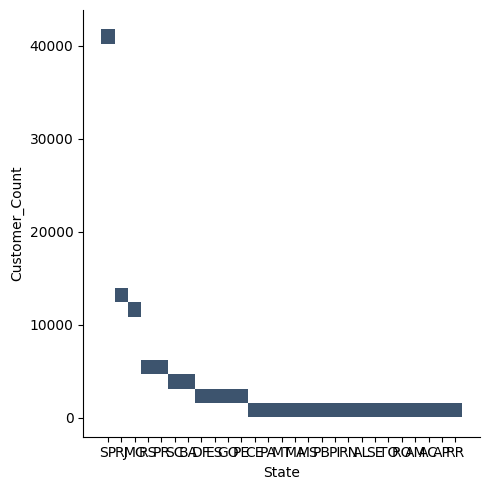

In [10]:
sns.displot(data=query_table, x="State", y="Customer_Count")

2. **In-depth Exploration:**
    * Is there a growing trend in the no. of orders placed over the past years?
    * Can we see some kind of monthly seasonality in terms of the no. of orders being placed?
    * During what time of the day, do the Brazilian customers mostly place their orders? (Dawn, Morning, Afternoon or Night)
        * 0-6 hrs : Dawn
        * 7-12 hrs : Mornings
        * 13-18 hrs : Afternoon
        * 19-23 hrs : Night

In [11]:
#Is there a growing trend in the no. of orders placed over the past years?
query = '''
SELECT 
    strftime('%Y', order_purchase_timestamp) as Year, 
    COUNT(order_id) as Order_Count
FROM orders
GROUP BY Year;
'''

pd.read_sql_query(query, conn)
# Yes, there is a noticeable upward trend in the number of orders over the years. 
# It's important to note that data from September 2016 to August 2018 accounts for this analysis. 
# Despite this, it remains impressive to witness the substantial growth over the years.
# the period from 2017 to AUG, 2018 experienced an growth of about 19%.
# During 2018, there were more orders placed in 8 months compared to the entire year of 2017.

,Year,Order_Count
0,2016,329
1,2017,45101
2,2018,54011


In [12]:
# Can we see some kind of monthly seasonality in terms of the no. of orders being placed?
query = '''
SELECT 
    strftime('%m', order_purchase_timestamp) as Month,
    COUNT(order_id) as Order_Count
FROM orders
GROUP BY Month;
'''
data = pd.read_sql_query(query, conn)
pd.read_sql_query(query, conn)
# During the summer, we observe a growth in placed orders. 
# It's essential to note that the data concludes in August 2018, which could be a reason for the decrease in orders post-August.

,Month,Order_Count
0,01,8069
1,02,8508
2,03,9893
3,04,9343
4,05,10573
5,06,9412
6,07,10318
7,08,10843
8,09,4305
9,10,4959


In [13]:
'''
During what time of the day, do the Brazilian customers mostly place their orders? (Dawn, Morning, Afternoon or Night)
0-6 hrs : Dawn
7-12 hrs : Mornings
13-18 hrs : Afternoon
19-23 hrs : Night
'''

query = '''
SELECT 
    CASE
        WHEN CAST(strftime('%H', order_purchase_timestamp) AS INTEGER) BETWEEN 0 AND 6 THEN 'Dawn'
        WHEN CAST(strftime('%H', order_purchase_timestamp) AS INTEGER) BETWEEN 7 AND 12 THEN 'Mornings'
        WHEN CAST(strftime('%H', order_purchase_timestamp) AS INTEGER) BETWEEN 13 AND 18 THEN 'Afternoon'
        WHEN CAST(strftime('%H', order_purchase_timestamp) AS INTEGER) BETWEEN 19 AND 23 THEN 'Night'
        ELSE 'Unknown'
    END as Time,
    COUNT(order_id) as Order_Count
FROM orders
GROUP BY Time
ORDER BY 2 DESC;
'''
data = pd.read_sql_query(query, conn)
pd.read_sql_query(query, conn)
# It's understandable that there are few orders from 0 to 6 am, 
# while throughout the day, there is a consistent flow of placed orders, with a noticeable surge during the afternoon.

,Time,Order_Count
0,Afternoon,38135
1,Night,28331
2,Mornings,27733
3,Dawn,5242


3. **Evolution of E-commerce orders in the Brazil region:**
    * Get the month on month no. of orders placed in each state.
    * How are the customers distributed across all the states?

In [14]:
# Get the month on month no. of orders placed in each state.
query = '''
SELECT
    customers.customer_state AS State,
    strftime('%m', order_purchase_timestamp) AS Month,
    COUNT(orders.order_id) AS Order_Count
FROM orders
JOIN customers
ON orders.customer_id = customers.customer_id
GROUP BY 1, 2
ORDER BY 2 ASC, 3 DESC;
'''
data = pd.read_sql_query(query, conn)
pd.read_sql_query(query, conn)
# State SP with most customers have most orders placed throughout the year.

,State,Month,Order_Count
0,SP,01,3351
1,RJ,01,990
2,MG,01,971
3,PR,01,443
4,RS,01,427
...,...,...,...
317,TO,12,14
318,RO,12,11
319,AM,12,6
320,AC,12,5


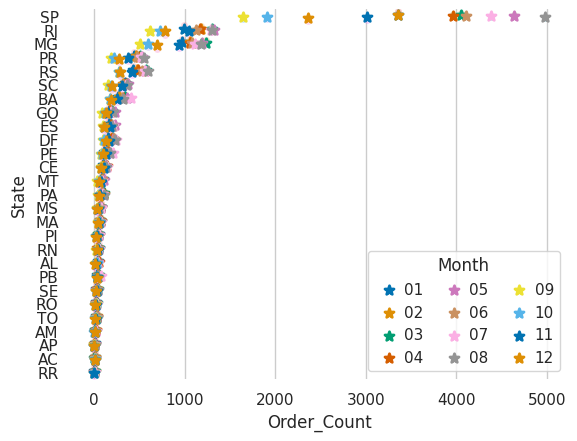

In [15]:
import seaborn as sns

sns.set_theme(style="whitegrid")

# Initialize the figure
f, ax = plt.subplots()
sns.despine(bottom=True, left=True)

sns.stripplot(
    data, x="Order_Count", y="State", hue="Month",
    dodge=True, alpha=.25, zorder=1, legend=False,
)

sns.pointplot(
    data, x="Order_Count", y="State", hue="Month", 
    dodge=.2, palette="colorblind", errorbar=None,
    markers="*", linestyles="none",
)

# Improve the legend
sns.move_legend(
    ax, loc="lower right", ncol=3, frameon=True, columnspacing=1, handletextpad=0,
)

4. **Impact on Economy: Analyze the money movement by e-commerce by looking at order prices, freight and others.**
    * Get the % increase in the cost of orders from year 2017 to 2018 (include months between Jan to Aug only). You can use the "payment_value" column in the payments table to get the cost of orders.
    * Calculate the Total & Average value of order price for each state.
    * Calculate the Total & Average value of order freight for each state.


In [16]:
# Get the % increase in the cost of orders from year 2017 to 2018 (include months between Jan to Aug only).
# You can use the "payment_value" column in the payments table to get the cost of orders.
query = '''
SELECT 
    strftime('%m', o.order_purchase_timestamp) AS Month,
    ROUND((
        (
            SUM(CASE WHEN strftime('%Y', o.order_purchase_timestamp) = '2018' AND
            strftime('%m', o.order_purchase_timestamp) BETWEEN '01' AND '08' THEN p.payment_value END)
            -
            SUM(CASE WHEN strftime('%Y', o.order_purchase_timestamp) = '2017' AND
            strftime('%m', o.order_purchase_timestamp) BETWEEN '01' AND '08' THEN p.payment_value END)
        )
        /
        SUM(CASE WHEN strftime('%Y', o.order_purchase_timestamp) = '2017' AND
        strftime('%m', o.order_purchase_timestamp) BETWEEN '01' AND '08' THEN p.payment_value END)
    ) * 100,1) AS Cost_Percentage
FROM orders AS o
JOIN payments AS p
ON p.order_id = o.order_id
WHERE
    strftime('%Y', o.order_purchase_timestamp) BETWEEN '2017' AND '2018' AND 
    strftime('%m', o.order_purchase_timestamp) BETWEEN '01' AND '08'
GROUP BY 1
ORDER BY 2 DESC;
'''
pd.read_sql_query(query, conn)
# In January, the payment amount significantly surges by 705%, which is approximately three times higher than February. 
# Meanwhile, August experiences a drastic decrease, being 14 times less than January.

,Month,Cost_Percentage
0,01,705.1
1,02,240.0
2,04,177.8
3,03,157.8
4,06,100.3
5,05,94.6
6,07,80.0
7,08,51.6


In [17]:
# Calculate the Total & Average value of order price for each state.
query = '''
SELECT 
    c.customer_state AS State,
    ROUND(SUM(ot.price),1) AS Total,
    ROUND(AVG(ot.price),1) AS Average
FROM orders o
JOIN order_items ot
ON o.order_id = ot.order_id
JOIN customers c
ON c.customer_id = o.customer_id
GROUP BY 1
ORDER BY 2 DESC;
'''
pd.read_sql_query(query, conn)
# Although the SP state has the highest total order price, its average is surprisingly the lowest.

,State,Total,Average
0,SP,5202955.1,109.7
1,RJ,1824092.7,125.1
2,MG,1585308.0,120.7
3,RS,750304.0,120.3
4,PR,683083.8,119.0
5,SC,520553.3,124.7
6,BA,511350.0,134.6
7,DF,302603.9,125.8
8,GO,294591.9,126.3
9,ES,275037.3,121.9


In [18]:
# Calculate the Total & Average value of order freight for each state.
query = '''
SELECT 
    c.customer_state AS State,
    ROUND(SUM(ot.freight_value),1) AS Total,
    ROUND(AVG(ot.freight_value),1) AS Average
FROM orders o
JOIN order_items ot
ON o.order_id = ot.order_id
JOIN customers c
ON c.customer_id = o.customer_id
GROUP BY 1
ORDER BY 2 DESC;
'''
pd.read_sql_query(query, conn)
# Again, Although the SP state has the highest total Freight cost, its average is surprisingly the lowest.

,State,Total,Average
0,SP,718723.1,15.1
1,RJ,305589.3,21.0
2,MG,270853.5,20.6
3,RS,135522.7,21.7
4,PR,117851.7,20.5
5,BA,100156.7,26.4
6,SC,89660.3,21.5
7,PE,59449.7,32.9
8,GO,53115.0,22.8
9,DF,50625.5,21.0


5. **Analysis based on sales, freight and delivery time.**
    1. Find the no. of days taken to deliver each order from the order’s purchase date as delivery time.
       
       Also, calculate the difference (in days) between the estimated & actual delivery date of an order.
       
       Do this in a single query.
       
       You can calculate the delivery time and the difference between the estimated & actual delivery date using the given formula:
       * time_to_deliver = order_delivered_customer_date - order_purchase_timestamp
       * diff_estimated_delivery = order_delivered_customer_date - order_estimated_delivery_date

    2. Find out the top 5 states with the highest & lowest average freight value.
    3. Find out the top 5 states with the highest & lowest average delivery time.
    4. Find out the top 5 states where the order delivery is really fast as compared to the estimated date of delivery.

        You can use the difference between the averages of actual & estimated delivery date to figure out how fast the delivery was for each state.

In [19]:
'''
Find the no. of days taken to deliver each order from the order’s purchase date as delivery time. 
Also, calculate the difference (in days) between the estimated & actual delivery date of an order.

Do this in a single query.

You can calculate the delivery time and the difference between the estimated & actual delivery date using the given formula:
* time_to_deliver = order_delivered_customer_date - order_purchase_timestamp
* diff_estimated_delivery = order_delivered_customer_date - order_estimated_delivery_date
'''

query = '''
SELECT 
    order_id,
    ROUND(julianday(order_delivered_customer_date) - julianday(order_purchase_timestamp),2) AS time_to_deliver,
    ROUND(julianday(order_delivered_customer_date) - julianday(order_estimated_delivery_date),2) AS diff_estimated_delivery
FROM orders
WHERE order_status = 'delivered' AND julianday(order_delivered_customer_date) - julianday(order_purchase_timestamp) IS NOT NULL
ORDER BY 2;
'''
pd.read_sql_query(query, conn)

,order_id,time_to_deliver,diff_estimated_delivery
0,1d893dd7ca5f77ebf5f59f0d2017eee0,0.53,-10.12
1,434cecee7d1a65fc65358a632b6f725f,0.78,-19.66
2,f3c6775ba3d2d9fe2826f93b71f12008,0.86,-11.66
3,8339b608be0d84fca9d8da68b58332c3,0.86,-27.27
4,e65f1eeee1f52024ad1dcd03447f7482,0.89,-9.48
...,...,...,...
96465,285ab9426d6982034523a855f55a885e,194.63,166.58
96466,2fb597c2f772eca01b1f5c561bf6cc7b,194.85,155.61
96467,440d0d17af552815d15a9e41abe49359,195.63,165.63
96468,1b3190b2dfa9d789e1f14c05b647a14a,208.35,188.98


In [20]:
# Find out the top 5 states with the highest & lowest average freight value.
query = '''
WITH Freight AS (
    SELECT 
        c.customer_state AS State,
        AVG(ot.freight_value) AS Average_Freight
    FROM orders o
    JOIN order_items ot ON o.order_id = ot.order_id
    JOIN customers c ON c.customer_id = o.customer_id
    GROUP BY 1
)
SELECT 
    State,
    Average_Freight
FROM (
    SELECT 
        State,
        Average_Freight,
        RANK() OVER (ORDER BY Average_Freight DESC) AS High,
        RANK() OVER (ORDER BY Average_Freight ASC) AS Low
    FROM Freight
) AS Ranked_States
WHERE High <= 5 OR Low <= 5;
'''
pd.read_sql_query(query, conn)

,State,Average_Freight
0,RR,42.984423
1,PB,42.723804
2,RO,41.069712
3,AC,40.073370
4,PI,39.147970
5,DF,21.041355
6,RJ,20.960924
7,MG,20.630167
8,PR,20.531652
9,SP,15.147275


In [21]:
# Find out the top 5 states with the highest & lowest average delivery time.
query = '''
WITH delivery AS (
    SELECT 
        c.customer_state AS State,
        AVG(julianday(order_delivered_customer_date) - julianday(order_purchase_timestamp)) AS time_to_deliver
    FROM orders o
    JOIN customers c ON c.customer_id = o.customer_id
    WHERE order_status = 'delivered' AND julianday(order_delivered_customer_date) - julianday(order_purchase_timestamp) IS NOT NULL
    GROUP BY 1
)
SELECT 
    State,
    time_to_deliver
FROM (
    SELECT 
        State,
        time_to_deliver,
        RANK() OVER (ORDER BY time_to_deliver DESC) AS High,
        RANK() OVER (ORDER BY time_to_deliver ASC) AS Low
    FROM delivery
) AS Ranked_States
WHERE High <= 5 OR Low <= 5;
'''
pd.read_sql_query(query, conn)

,State,time_to_deliver
0,RR,29.387546
1,AP,27.185068
2,AM,26.425991
3,AL,24.543855
4,PA,23.772917
5,SC,14.954783
6,DF,12.967568
7,MG,12.008666
8,PR,11.991582
9,SP,8.761386


In [22]:
# Find out the top 5 states where the order delivery is really fast as compared to the estimated date of delivery.
query = '''
WITH delivery AS (
    SELECT 
        c.customer_state AS State,
        ABS(AVG(julianday(order_delivered_customer_date) - julianday(order_estimated_delivery_date))) AS delivery_fast
    FROM orders o
    JOIN customers c ON c.customer_id = o.customer_id
    WHERE order_status = 'delivered' AND julianday(order_delivered_customer_date) - julianday(order_estimated_delivery_date) IS NOT NULL
    GROUP BY 1
)
SELECT 
    State,
    delivery_fast
FROM (
    SELECT 
        State,
        delivery_fast,
        RANK() OVER (ORDER BY delivery_fast DESC) AS High,
        RANK() OVER (ORDER BY delivery_fast ASC) AS Low
    FROM delivery
) AS Ranked_States
WHERE High <= 5 OR Low <= 5;
'''
pd.read_sql_query(query, conn)

,State,delivery_fast
0,AC,20.077007
1,RO,19.396826
2,AP,19.059423
3,AM,18.851817
4,RR,16.594598
5,BA,10.099073
6,ES,9.797109
7,SE,9.328641
8,MA,8.887844
9,AL,8.032059


6. **Analysis based on the payments:**
    * Find the month on month no. of orders placed using different payment types.
    * Find the no. of orders placed on the basis of the payment installments that have been paid.

In [23]:
query = '''
SELECT
    p.payment_type AS 'Payment Type',
    COUNT(DISTINCT o.order_id) AS 'Count Orders'
FROM payments p
JOIN orders o
ON o.order_id = p.order_id
WHERE o.order_status = 'delivered'
GROUP BY 1
ORDER BY 2 DESC,1
'''
data = pd.read_sql_query(query, conn)
pd.read_sql_query(query, conn)

,Payment Type,Count Orders
0,credit_card,74304
1,UPI,19191
2,voucher,3679
3,debit_card,1485


In [24]:
fig = px.funnel(data, x='Count Orders', y='Payment Type')
fig.show()

In [25]:
# Find the month on month no. of orders placed using different payment types.
query = '''
SELECT
    p.payment_type AS 'Payment Type',
    strftime('%m', order_purchase_timestamp) AS Months,
    COUNT(DISTINCT o.order_id) AS 'Count Orders'
FROM payments p
JOIN orders o
ON o.order_id = p.order_id
WHERE o.order_status = 'delivered'
GROUP BY 1,2
ORDER BY 3 DESC,1
'''
data = pd.read_sql_query(query, conn)
pd.read_sql_query(query, conn)
# The data indicates that Credit Card is the preferred payment type for most customers, possibly due to cashback or offers. 
# UPI follows closely in usage, while vouchers and debit cards are favored by a smaller group of customers.

,Payment Type,Months,Count Orders
0,credit_card,05,8090
1,credit_card,08,8057
2,credit_card,07,7604
3,credit_card,03,7410
4,credit_card,06,7105
5,credit_card,04,7088
6,credit_card,02,6345
7,credit_card,01,5901
8,credit_card,11,5686
9,credit_card,12,4233


In [26]:
# Find the no. of orders placed on the basis of the payment installments that have been paid.
query = '''
SELECT 
    p.payment_installments AS 'Payment Installments',
    COUNT(DISTINCT o.order_id) AS 'Count Orders'
FROM payments p
JOIN orders o
ON o.order_id = p.order_id
WHERE o.order_status = 'delivered'
GROUP BY 1
ORDER BY 1
'''
pd.read_sql_query(query, conn)
# Customers prefer to pay in full, utilizing a combination of UPI, debit card, voucher, and credit card. 
# Introducing a new column for payment type could reveal insightful information.

,Payment Installments,Count Orders
0,0,2
1,1,47586
2,2,12052
3,3,10147
4,4,6882
5,5,5090
6,6,3800
7,7,1560
8,8,4122
9,9,618


In [27]:
# Find the no. of orders placed on the basis of the payment installments that have been paid.
query = '''
SELECT 
    p.payment_type AS 'Payment Type',
    p.payment_installments AS 'Payment Installments',
    COUNT(DISTINCT o.order_id) AS 'Count Orders'
FROM payments p
JOIN orders o
ON o.order_id = p.order_id
WHERE o.order_status = 'delivered'
GROUP BY 1,2
ORDER BY 1
'''
pd.read_sql_query(query, conn)

,Payment Type,Payment Installments,Count Orders
0,UPI,1,19191
1,credit_card,0,2
2,credit_card,1,24711
3,credit_card,2,12052
4,credit_card,3,10147
5,credit_card,4,6882
6,credit_card,5,5090
7,credit_card,6,3800
8,credit_card,7,1560
9,credit_card,8,4122
